In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('employee-earnings-report-2016.csv',encoding="ISO-8859-1")
dataframe = pd.DataFrame(data)

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22046 entries, 0 to 22045
Data columns (total 12 columns):
NAME                         22046 non-null object
DEPARTMENT_NAME              22046 non-null object
TITLE                        22046 non-null object
REGULAR                      21463 non-null object
RETRO                        416 non-null object
OTHER                        12845 non-null object
OVERTIME                     6690 non-null object
INJURED                      1378 non-null object
DETAIL                       2425 non-null object
QUINN/EDUCATION INCENTIVE    1290 non-null object
TOTAL EARNINGS               22046 non-null object
POSTAL                       22045 non-null object
dtypes: object(12)
memory usage: 2.0+ MB


#### question 1

In [4]:
dataframe.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,"$46,291.98",NaN,$300.00,NaN,NaN,NaN,NaN,"$46,591.98",02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,"$6,933.66",NaN,$850.00,$205.92,"$74,331.86",NaN,"$15,258.44","$97,579.88",02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$103,442.22",NaN,$550.00,"$15,884.53",NaN,"$4,746.50",NaN,"$124,623.25",02132
3,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),"$18,249.83",NaN,NaN,NaN,NaN,NaN,NaN,"$18,249.83",02148
4,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,"$84,410.28",NaN,"$1,250.00",NaN,NaN,NaN,NaN,"$85,660.28",02481


In [5]:
dataframe['NAME'].duplicated().sum()

82

In [6]:
dataframe[dataframe['NAME'].duplicated()]['NAME']

268           Allen,Katherine
357             Alves,John F.
423           Anderson,Daniel
2094           Brown,Charlene
2491         Butler,Michael V
3846          Colon,Francisco
3908             Conley,James
4012           Conroy,Patrick
4440         Crowley,Kathleen
4443          Crowley,Michael
4621             Curtis,David
5502          Doherty,Brian J
6690        Finnigan,Patricia
6807            Flaherty,Sean
6910             Flynn,Robert
6951            Foley,Kevin J
6978          Foley,William P
7361        Gallagher,Kelly A
7893               Gomez,Juan
7941            Gonzalez,Jose
8171            Green,Anthony
8217            Greene,John J
8266        Griffin,Daniel G.
8686     Harrington,Richard F
8721            Harris,John W
9427             Horne,Edward
10058         Johnson,Cynthia
10214          Jones,Patricia
10284             Joseph,Jean
10614            Kelley,Susan
                 ...         
13924          Mills,Lemuel V
14463        Mullaly,Michelle
14548     

In [7]:
dataframe['NAME'].value_counts()

Sullivan,Michael        4
Kelly,Michael           3
Williams,Kevin          2
Martinez,David          2
Lynch,Patrick           2
Sullivan,John           2
Murphy,Daniel           2
Crowley,Kathleen        2
Walsh,Mary E            2
Doherty,Brian J         2
Gomez,Juan              2
Curtis,David            2
Smith,Michael           2
Conroy,Patrick          2
Marsh,Kathleen A        2
Norton,Stephen          2
Harrington,Richard F    2
Powers,Robert E         2
Harris,John W           2
Gallagher,Kelly A       2
Torres,Elizabeth        2
Sullivan,Kevin          2
Thompson,Anthony        2
Wilson,Laura            2
McManus,Michael J       2
Smith,Robert            2
Alves,John F.           2
McClain,Diane           2
Flaherty,Sean           2
McDonald,John           2
                       ..
Aguilar,Luis            1
Hackett,Gail M          1
Puopolo,Stephen E       1
Hernandez,Niurka S.     1
Jean,Nadine F           1
Mackenzie,Ian C.        1
Chin,Yui Ying           1
Thornton,Dia

In [8]:
dataframe[['NAME','DEPARTMENT_NAME']].nunique()


NAME               21964
DEPARTMENT_NAME      228
dtype: int64

In [9]:
# how many names appear multiple times in our dataset? 
dataframe['NAME'].duplicated().sum()

82

In [10]:
dataframe.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,"$46,291.98",NaN,$300.00,NaN,NaN,NaN,NaN,"$46,591.98",02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,"$6,933.66",NaN,$850.00,$205.92,"$74,331.86",NaN,"$15,258.44","$97,579.88",02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$103,442.22",NaN,$550.00,"$15,884.53",NaN,"$4,746.50",NaN,"$124,623.25",02132
3,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),"$18,249.83",NaN,NaN,NaN,NaN,NaN,NaN,"$18,249.83",02148
4,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,"$84,410.28",NaN,"$1,250.00",NaN,NaN,NaN,NaN,"$85,660.28",02481


In [11]:
# mash the name and department into one string for folks with same name woring in different departments
dataframe['COMBO_STRING'] = dataframe['NAME'] + dataframe['DEPARTMENT_NAME'] 
dataframe['COMBO_STRING'].duplicated().sum()

9

In [12]:
# lets mash the name, department and title into one string to see if anything changes
dataframe['COMBO_N-D-T'] = dataframe['NAME'] + dataframe['DEPARTMENT_NAME'] + dataframe['TITLE']
dataframe['COMBO_N-D-T'].duplicated().sum()

4

#### question 2

In [13]:
dataframe['DEPARTMENT_NAME'].nunique()

228

#### question 3

In [14]:
dataframe['TOTAL EARNINGS'].max()

'$990.64'

In [17]:
dataframe['TOTAL EARNINGS'].sort_values(ascending=False)

10478       $990.64
15036       $990.64
21380       $990.63
1869        $990.62
13303       $990.61
21999       $990.61
1960     $99,997.38
1083     $99,989.18
5999     $99,972.07
18134    $99,970.30
3626     $99,964.18
19480    $99,960.31
9122     $99,958.32
19160    $99,954.56
17122    $99,948.98
19155    $99,948.20
10781    $99,946.98
21394    $99,939.24
9463     $99,934.75
14541    $99,920.78
7        $99,920.14
20013    $99,910.16
10902    $99,909.47
2226     $99,903.72
3632     $99,900.09
18853    $99,898.10
2275     $99,895.92
20832    $99,891.68
15449    $99,891.68
19587    $99,886.02
            ...    
8118      $1,125.57
4483      $1,123.68
5717      $1,120.00
7179      $1,108.73
14083     $1,107.49
6913      $1,103.65
11759     $1,103.51
16973     $1,093.20
8253      $1,090.00
15086     $1,077.96
4151      $1,075.00
6365      $1,074.96
10440     $1,071.50
15919     $1,052.15
2119      $1,052.06
12803     $1,043.33
15344     $1,036.87
10735     $1,036.50
21446     $1,028.51


#### <font color=red>Wait, that don't look right. Let's examine.</font>

In [18]:
#check the values in the dataset. What is the range of salary and total compensation for a 5 row slice?
dataframe.tail()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL,COMBO_STRING,COMBO_N-D-T
22041,"Zukowski III,Charles",BPS School Safety Service,Officer-Bps Police,"$45,118.54",NaN,$600.00,$271.92,NaN,NaN,NaN,"$45,990.46",02124,"Zukowski III,CharlesBPS School Safety Service","Zukowski III,CharlesBPS School Safety ServiceO..."
22042,"Zuluaga Castro,Juan Pablo",Boston Cntr - Youth & Families,Lifeguard I,"$3,538.84",NaN,NaN,$51.78,NaN,NaN,NaN,"$3,590.62",02128,"Zuluaga Castro,Juan PabloBoston Cntr - Youth ...","Zuluaga Castro,Juan PabloBoston Cntr - Youth ..."
22043,"Zwarich,Maralene Zoann",Dudley St. Neighborhood School,Teacher,"$41,747.07",NaN,NaN,NaN,NaN,NaN,NaN,"$41,747.07",02118,"Zwarich,Maralene ZoannDudley St. Neighborhood ...","Zwarich,Maralene ZoannDudley St. Neighborhood ..."
22044,"Zweig,Susanna B",BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$29,489.32",NaN,NaN,NaN,NaN,NaN,NaN,"$29,489.32",02125,"Zweig,Susanna BBPS Substitute Teachers/Nurs","Zweig,Susanna BBPS Substitute Teachers/NursSub..."
22045,"Zwerdling,Laura",BPS Special Education,Teacher,"$72,207.20",NaN,NaN,NaN,NaN,NaN,NaN,"$72,207.20",02140,"Zwerdling,LauraBPS Special Education","Zwerdling,LauraBPS Special EducationTeacher"


In [19]:
# Why is the retruned 'Max' less than even the lowest total earnings value in our subset? 
type(dataframe['TOTAL EARNINGS'].max())

str

In [20]:
# looks like our total earnings data has string type,  not an integer. What about regular pay?
dataframe.applymap(type).eq(str).all()

NAME                          True
DEPARTMENT_NAME               True
TITLE                         True
REGULAR                      False
RETRO                        False
OTHER                        False
OVERTIME                     False
INJURED                      False
DETAIL                       False
QUINN/EDUCATION INCENTIVE    False
TOTAL EARNINGS                True
POSTAL                       False
COMBO_STRING                  True
COMBO_N-D-T                   True
dtype: bool

In [23]:
dataframe.applymap(type).eq(str).any()

NAME                         True
DEPARTMENT_NAME              True
TITLE                        True
REGULAR                      True
RETRO                        True
OTHER                        True
OVERTIME                     True
INJURED                      True
DETAIL                       True
QUINN/EDUCATION INCENTIVE    True
TOTAL EARNINGS               True
POSTAL                       True
COMBO_STRING                 True
COMBO_N-D-T                  True
dtype: bool

In [24]:
dataframe['TOTAL EARNINGS'][0]

'$46,591.98'

In [25]:
# convert total earnings data from string to integer so we can work with it.
def cash_conversion(amount):
    return float(amount.replace('$','').replace(',',''))

dataframe['TOTAL EARNINGS'] = dataframe['TOTAL EARNINGS'].apply(cash_conversion)

### <font color=green>Taking a quick peak.</font>

In [26]:
print('Below is a breakdown, numerical summary of the total earnings data.\n')
print(dataframe['TOTAL EARNINGS'].describe())
print('\nBelow are the salaries of the top five highest total earners.')
print(dataframe['TOTAL EARNINGS'].sort_values(ascending=False).head(5))
print('\nBelow is the information on this highest earner?')
baller = dataframe['TOTAL EARNINGS'].max()
dataframe[dataframe['TOTAL EARNINGS'] == baller]

Below is a breakdown, numerical summary of the total earnings data.

count     22046.000000
mean      71677.868383
std       51862.214555
min           2.140000
25%       30219.902500
50%       66063.970000
75%      104110.042500
max      403408.610000
Name: TOTAL EARNINGS, dtype: float64

Below are the salaries of the top five highest total earners.
11489    403408.61
10327    396348.50
15716    373959.35
2113     351825.50
9446     346105.17
Name: TOTAL EARNINGS, dtype: float64

Below is the information on this highest earner?


,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL,COMBO_STRING,COMBO_N-D-T
11489,"Lee,Waiman",Boston Police Department,Police Detective,"$92,514.73","$92,489.74","$21,850.80","$58,600.49",NaN,"$121,946.00","$16,006.85",403408.61,02134,"Lee,WaimanBoston Police Department","Lee,WaimanBoston Police DepartmentPolice Detec..."


In [51]:
cheese = dataframe['TOTAL EARNINGS'].max()
dataframe[dataframe['TOTAL EARNINGS'] == cheese]

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
11489,"Lee,Waiman",Boston Police Department,Police Detective,"$92,514.73","$92,489.74","$21,850.80","$58,600.49",NaN,"$121,946.00","$16,006.85",403408.61,02134



    

#### question 4

In [72]:
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of Arts & Culture']['NAME'].nunique()

12

#### question 5

In [77]:
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of Arts & Culture']['NAME']

2436              Burros,Julie
2437           Burroughs,Alene
4437           Crowley,John A.
6145       Elliott-Ortega,Kara
6959               Foley,Niall
7968       Goodfellow,Karin E.
8223             Greene,Melodi
8362          Guerra,Christian
10154       Johnston,Jr,Thomas
13190    McDonough,Ellen Marie
16980     Redd,Rachedl Council
18297          Schork,Heidi A.
Name: NAME, dtype: object

#### question 6

In [86]:
#here we pass a list of column names to get the slice we want. 
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of Arts & Culture'][['NAME','TOTAL EARNINGS']]\
.sort_values('TOTAL EARNINGS',ascending=False)

,NAME,TOTAL EARNINGS
2436,"Burros,Julie",129442.43
7968,"Goodfellow,Karin E.",92114.16
13190,"McDonough,Ellen Marie",76752.09
10154,"Johnston,Jr,Thomas",69512.41
6145,"Elliott-Ortega,Kara",68781.34
18297,"Schork,Heidi A.",66120.79
4437,"Crowley,John A.",60554.55
8223,"Greene,Melodi",58414.96
2437,"Burroughs,Alene",54796.84
8362,"Guerra,Christian",27266.25


#### question 7

In [128]:
print(dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of Arts & Culture']['TOTAL EARNINGS'].mean())
#store as a variable for reuse
oac_mean_earnings = dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of Arts & Culture']['TOTAL EARNINGS'].mean()
oac_mean_earnings

59834.455


59834.454999999994

### <font color=green>Taking a quick peak.</font>

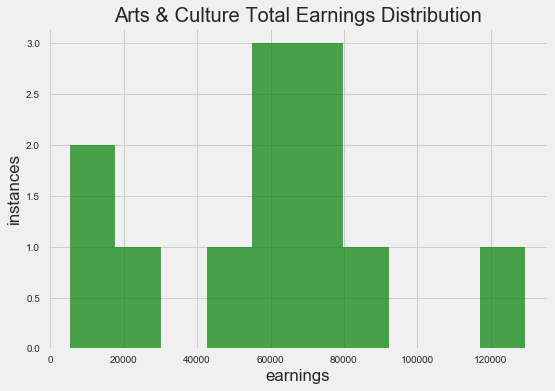

In [122]:
plt.style.use('fivethirtyeight')
plt.hist(dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of Arts & Culture']['TOTAL EARNINGS'],\
        color='green',alpha=.7)
plt.title('Arts & Culture Total Earnings Distribution')
plt.xlabel('earnings')
plt.ylabel('instances');





#### question 8

In [140]:
#get and store arts academy staff avg salary as variable for later use
bps_arts_mean_earnings = dataframe[dataframe['DEPARTMENT_NAME'] == 'BPS Boston Arts Academy']\
['TOTAL EARNINGS'].mean()
bps_arts_mean_earnings

72701.096623376623

In [144]:
#compare the arts and culture office average salary against the arts academy teachers salary
print('Is the average salary for an Arts & Culture Office employee more than the average salary for an Arts Academy staff member?')
oac_mean_earnings >= bps_arts_mean_earnings

Is the average salary for an Arts & Culture Office employee more than the average salary for an Arts Academy staff member?


False

In [151]:
round(bps_arts_mean_earnings - oac_mean_earnings,1)

12866.6

#### question 9

In [161]:
# one way to do it....
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of New Bostonians']['NAME'].count()

8

In [169]:
# checking through another way...
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of New Bostonians']['NAME'].duplicated()

1033     False
2768     False
3276     False
9888     False
11374    False
11539    False
19034    False
19240    False
Name: NAME, dtype: bool

In [166]:
# another way to do it...
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of New Bostonians']['NAME'].nunique()

8

### <font color=green>Taking a quick peak.</font>

In [165]:
dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of New Bostonians'].describe()

,TOTAL EARNINGS
count,8.000000
mean,59262.672500
std,22919.777122
min,28280.000000
25%,44082.077500
50%,63599.800000
75%,67605.527500
max,99742.100000


#### question 10

In [245]:
# lets get and save the office average salary as a variable for later use
onb_mean_earnings = dataframe[dataframe['DEPARTMENT_NAME'] == 'Office of New Bostonians']\
['TOTAL EARNINGS'].mean()

In [246]:
onb_mean_earnings

59262.672500000001

In [257]:
#lets get and save the average salary for Boston's employees
all_city_mean_earnings = dataframe['TOTAL EARNINGS'].mean()

In [258]:
all_city_mean_earnings

71677.868382926608

In [260]:
# use the variables to ask the question
onb_mean_earnings >= all_city_mean_earnings

False

(15000, 350000)

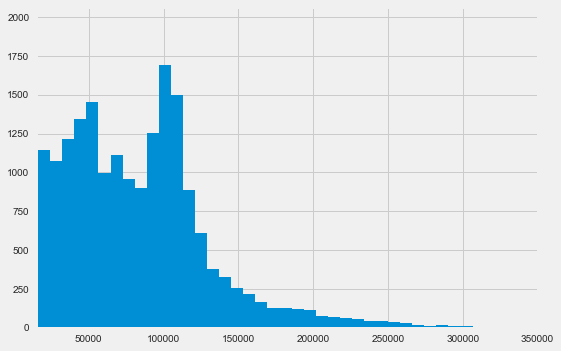

In [269]:
plt.hist(dataframe['TOTAL EARNINGS'],bins=50);
plt.xlim(15000,350000)

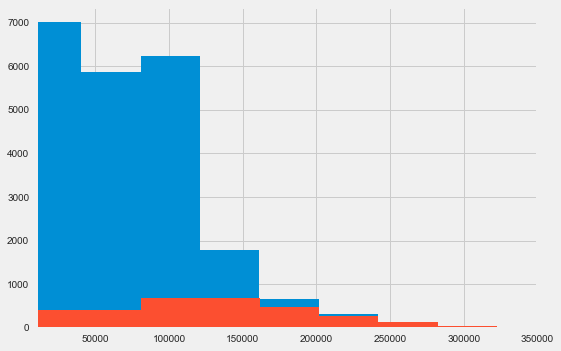

In [281]:
plt.hist(dataframe['TOTAL EARNINGS'])
plt.hist(dataframe[dataframe['DEPARTMENT_NAME']=='Boston Police Department']['TOTAL EARNINGS'])
plt.xlim(10000,350000);

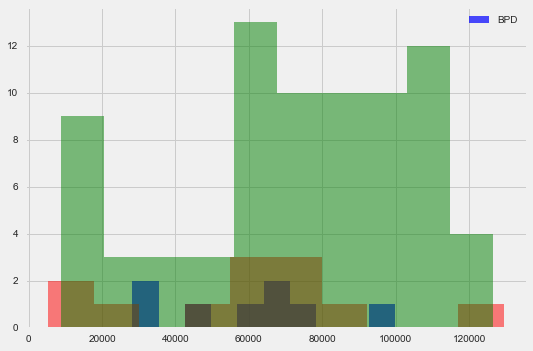

In [301]:
plt.hist(dataframe[dataframe['DEPARTMENT_NAME']=='Office of New Bostonians']\
         ['TOTAL EARNINGS'],color='blue',alpha=.7,label='BPD');


plt.hist(dataframe[dataframe['DEPARTMENT_NAME']=='Office of Arts & Culture']\
         ['TOTAL EARNINGS'],color='red',alpha=.5)
plt.hist(dataframe[dataframe['DEPARTMENT_NAME']=='BPS Boston Arts Academy']\
         ['TOTAL EARNINGS'],color='green',alpha=.5)

plt.legend()